### NYC TAXI TRIP DURATION PREDICTION


In this project we are provided with the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips that took place in different parts of New York City and how much time did that trip take to complete. The dataset contains 729322 trip records.The objective is to explore various attributes and build a Predictive model that predicts the total trip duration of taxi trips in New York City

Data attributes info

● id - a unique identifier for each trip

● vendor_id - a code indicating the service provider associated with the trip record

● pickup_datetime - date and time when the meter was engaged

● dropoff_datetime - date and time when the meter was disengaged

● passenger_count - the number of passengers in the vehicle 

● pickup_longitude - the longitude where the meter was engaged

● pickup_latitude - the latitude where the meter was engaged

● dropoff_longitude - the longitude where the meter was disengaged

● dropoff_latitude - the latitude where the meter was disengaged

● store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

● trip_duration - duration of the trip in seconds

In [2]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [3]:
#loading dataset
data=pd.read_csv("nyc_taxi_trip_duration_pred.csv")

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 09:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 06:42,17-02-2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data.shape

(20026, 11)

In [5]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
#DateTime columns for Pickup and Dropoff needs Feature extraction as there might be lots of hidden info.
#converting datatype of 'pickup_datetime' and 'dropoff_datetime' to datetime

data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [8]:
#checking

data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

FEATURE ENGINEERING
Date and time columns in the Dataset has whole lot story to tell, so we have to fetch them as separate features.

In [9]:
#Extracting day, month, hour, weekday from datetime

data['pickup_day'] = data['pickup_datetime'].dt.day
data['dropoff_day'] = data['dropoff_datetime'].dt.day

data['pickup_month'] = data['pickup_datetime'].dt.month
data['dropoff_month'] = data['dropoff_datetime'].dt.month

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

data['pickup_weekday'] = data['pickup_datetime'].dt.weekday
data['dropoff_weekday'] = data['dropoff_datetime'].dt.weekday

In [10]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,400,29,29,2,2,16,16,0,0
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,3,11,11,23,23,3,3
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,21,21,2,2,17,18,6,6
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,1,5,5,9,10,6,6
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,848,17,17,2,2,6,6,2,2


In [11]:
data['pickup_day'].value_counts()

16    25519
14    25206
12    25156
15    25037
5     25030
4     24958
6     24757
9     24729
13    24649
19    24646
20    24584
10    24575
11    24361
17    24338
21    24260
7     24254
18    24128
8     24113
2     23899
3     23858
26    23709
22    23627
29    23391
27    23376
1     23293
25    23288
28    22916
24    21877
23    20757
30    19642
31    11389
Name: pickup_day, dtype: int64

In [11]:
data['dropoff_day'].value_counts()

4     1435
3     1410
6     1367
5     1350
2     1266
1     1188
16     723
14     699
18     689
25     685
21     684
20     677
17     676
22     668
15     663
19     656
26     655
13     642
28     626
27     617
29     611
23     606
24     595
30     521
31     316
7        1
Name: dropoff_day, dtype: int64

In [12]:
def timezone(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [13]:
data['pickup_timezone']=data['pickup_hour'].apply(timezone)
data['dropoff_timezone']=data['dropoff_hour'].apply(timezone)

In [14]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,...,29,29,2,2,16,16,0,0,Evening,Evening
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,...,3,3,11,11,23,23,3,3,Late night,Late night
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,...,21,21,2,2,17,18,6,6,Evening,Evening
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,1,5,5,9,10,6,6,Morning,Morning
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,...,17,17,2,2,6,6,2,2,Morning,Morning


In [15]:
# checking for null values(we can conclude that our Dataset has no NULL values !!)
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
dropoff_day           0
pickup_month          0
dropoff_month         0
pickup_hour           0
dropoff_hour          0
pickup_weekday        0
dropoff_weekday       0
pickup_timezone       0
dropoff_timezone      0
dtype: int64

GEO SPATIAL DATA CONVERSION

we have lattitude and longitude of pickup and dropoff locations, with the help of that we can derive distance of each trips

In [16]:
!pip install geopy

In [17]:
from geopy.distance import great_circle

In [18]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [19]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [20]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,N,...,29,2,2,16,16,0,0,Evening,Evening,1.199074
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,N,...,3,11,11,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,N,...,21,2,2,17,18,6,6,Evening,Evening,7.250763
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,5,5,9,10,6,6,Morning,Morning,2.361100
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,N,...,17,2,2,6,6,2,2,Morning,Morning,4.328540


# DATA VISUALISATION

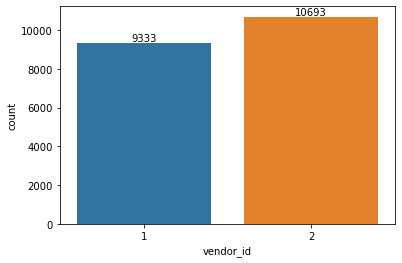

In [21]:
ax=sns.countplot(x='vendor_id',data=data)

for container in ax.containers:
    ax.bar_label(container)

From Above Visualization, we can say that there are 2 Service Providers.

2nd Service provider is the most opted one by New Yorkers.

Text(0.5, 1.0, 'Store and Forward Flag')

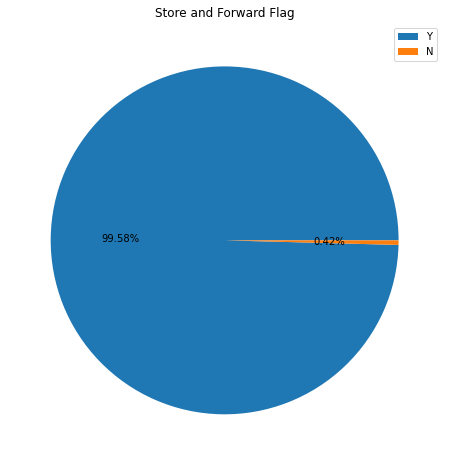

In [22]:
#Store & Forward flag

plt.figure(figsize=(8,8))
plt.pie(data['store_and_fwd_flag'].value_counts(), autopct='%1.2f%%')
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

store_and_fwd_flag tells whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y = store and forward; N = not a store and forward trip.
Visualization tells us that there were very few trips of which the records were stored in memory due to no connection to the server.

In [23]:
#Label Encoding 'store_and_fwd_flag' and 'vendor_id' since they are  Categorical Values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data['store_and_fwd_flag'] = enc.fit_transform(data['store_and_fwd_flag'])
data['vendor_id'] = enc.fit_transform(data['vendor_id'])

In [24]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance
0,id1080784,1,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,0,...,29,2,2,16,16,0,0,Evening,Evening,1.199074
1,id0889885,0,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,0,...,3,11,11,23,23,3,3,Late night,Late night,4.129117
2,id0857912,1,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,0,...,21,2,2,17,18,6,6,Evening,Evening,7.250763
3,id3744273,1,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,0,...,1,5,5,9,10,6,6,Morning,Morning,2.361100
4,id0232939,0,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,0,...,17,2,2,6,6,2,2,Morning,Morning,4.328540


C:\Users\USER\anaconda3.x\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

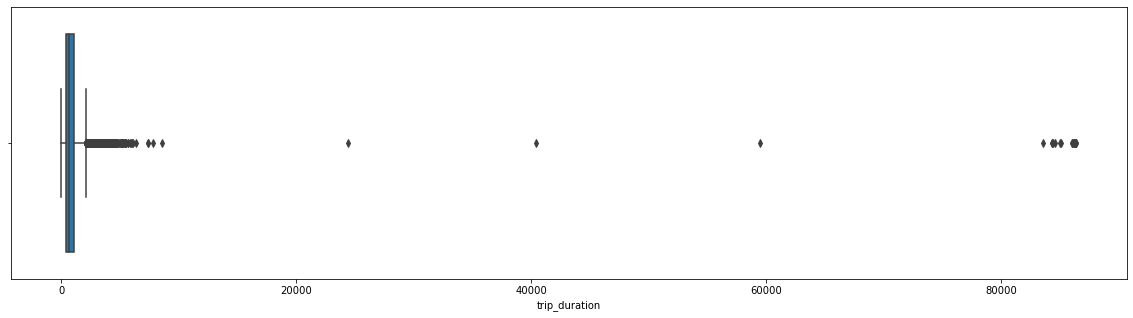

In [25]:
#Visualising Trip duration we can clearly notice an outlier at extreme right

plt.figure(figsize=(20,5))
sns.boxplot(data['trip_duration'])

In [26]:
data['trip_duration'].sort_values(ascending=False)

3018     86342
11676    86322
13695    86290
15031    86290
8001     86276
         ...  
15550        3
19446        3
12431        3
4540         3
3169         2
Name: trip_duration, Length: 20026, dtype: int64

In [28]:
#data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

C:\Users\USER\anaconda3.x\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Passenger Count Distribution')

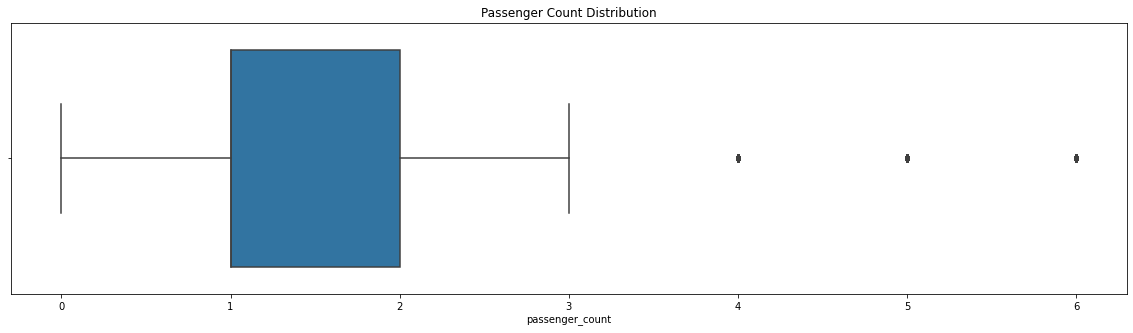

In [27]:
#Spread of Passenger count

plt.figure(figsize=(20,5))
sns.boxplot(data['passenger_count'])
plt.title('Passenger Count Distribution')

In [28]:
data.passenger_count.value_counts()

1    14014
2     3003
5     1110
3      828
6      682
4      388
0        1
Name: passenger_count, dtype: int64

Most number of trips are carried out by 1 or 2 passengers.
There exist trip with Zero passengers! May be due to  False data recorded
Above 6 passengers count is very less

In [29]:
#trips with passengers count 0 is removing
data=data[data['passenger_count']!=0]

In [30]:
data.passenger_count.value_counts()

1    14014
2     3003
5     1110
3      828
6      682
4      388
Name: passenger_count, dtype: int64

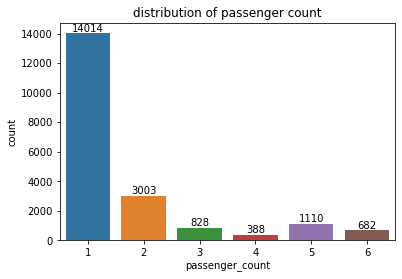

In [31]:
ax=sns.countplot(x=data['passenger_count'])
plt.title('distribution of passenger count')

for container in ax.containers:
    ax.bar_label(container)

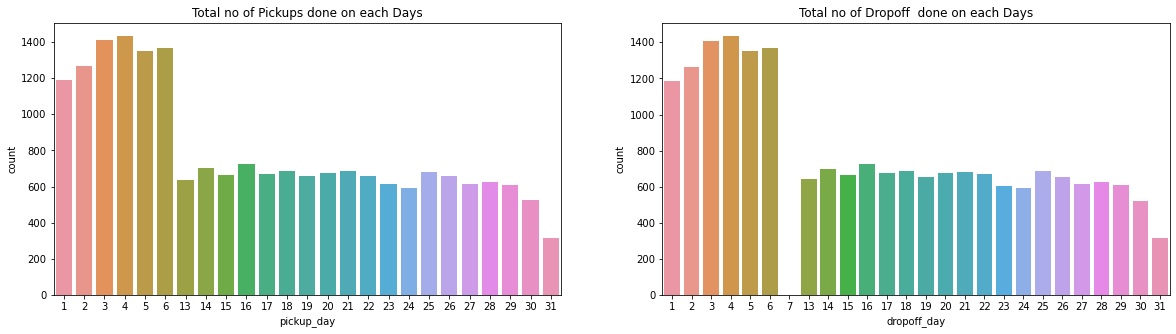

In [32]:
#count of pickup and drop off in each day

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Total no of Pickups done on each Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)

ax2.set_title('Total no of Dropoff  done on each Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

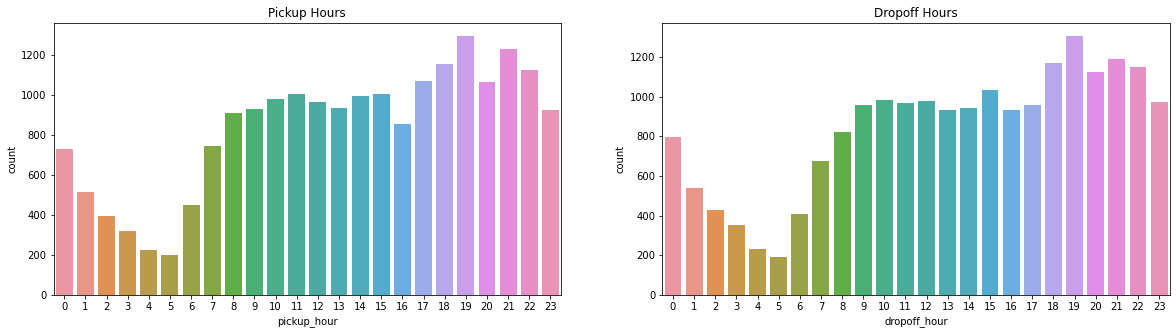

In [33]:
#count of pickup and drop off in each hour of day

figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Hours')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax3)

ax4.set_title('Dropoff Hours')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax4)

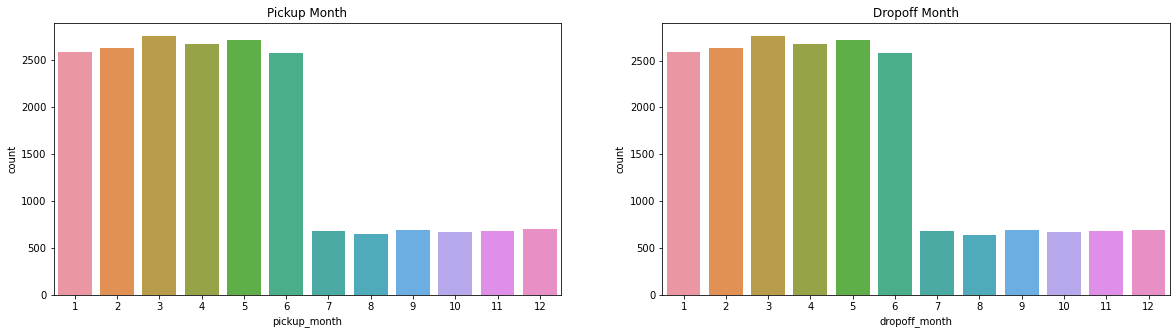

In [34]:
#count of pickup and drop off in every month

figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))

ax5.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax5)

ax6.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax6)

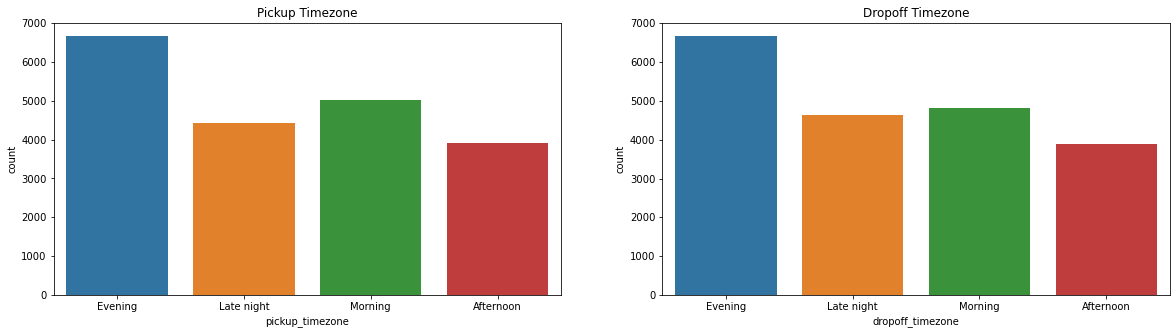

In [35]:
#count of pickup and drop off during evry time of day

figure,(ax7,ax8)=plt.subplots(ncols=2,figsize=(20,5))

ax7.set_title('Pickup Timezone')
ax=sns.countplot(x="pickup_timezone",data=data,ax=ax7)

ax8.set_title('Dropoff Timezone')
ax=sns.countplot(x="dropoff_timezone",data=data,ax=ax8)

b) Bivariate analysis

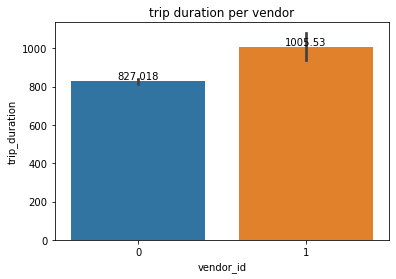

In [36]:
#trip duration per vendor

ax=sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)
ax.set_title('trip duration per vendor')

for container in ax.containers:
    ax.bar_label(container)

Text(0.5, 1.0, 'trip duration per hour')

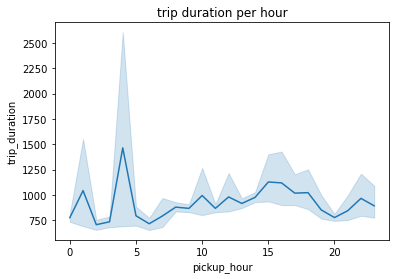

In [37]:
#Hourly trip duration

ax=sns.lineplot(x='pickup_hour',y='trip_duration',data=data)
ax.set_title('trip duration per hour')

Text(0.5, 1.0, 'trip duration per day of month')

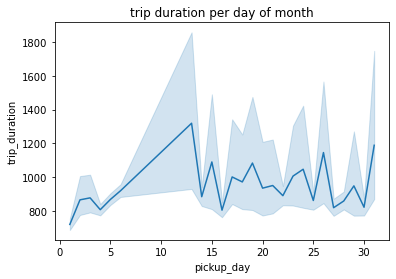

In [38]:
ax=sns.lineplot(x='pickup_day',y='trip_duration',data=data)
ax.set_title('trip duration per day of month')

Text(0.5, 1.0, 'distance in each timezone in a day')

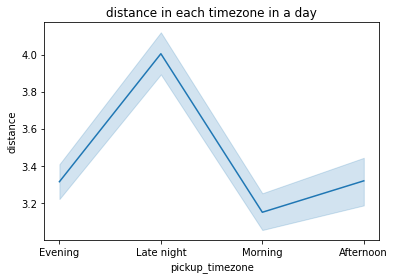

In [39]:
ax=sns.lineplot(x='pickup_timezone',y='distance',data=data)
ax.set_title('distance in each timezone in a day')

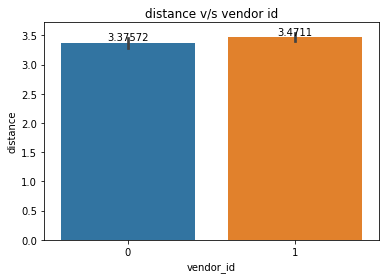

In [40]:
#Total distance covered by each vendor

ax=sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)
ax.set_title('distance v/s vendor id')

for container in ax.containers:
    ax.bar_label(container)

In [41]:
data[data.trip_duration==1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance


In [44]:
#we can observe that there are some rows with 1sec as trip duration, which is not possible we need to delete them all
#data=data[data.trip_duration!=data.trip_duration.max()]
#data=data[data.trip_duration!=data.trip_duration.min()]

In [42]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
       'dropoff_month', 'pickup_hour', 'dropoff_hour', 'pickup_weekday',
       'dropoff_weekday', 'pickup_timezone', 'dropoff_timezone', 'distance'],
      dtype='object')

In [43]:
#now we need to delete some columns which are no longer needed
data.drop(['id','pickup_datetime','dropoff_datetime'], axis=1, inplace=True)

In [44]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance
0,1,1,-73.953918,40.778873,-73.963875,40.771164,0,400,29,29,2,2,16,16,0,0,Evening,Evening,1.199074
1,0,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,3,3,11,11,23,23,3,3,Late night,Late night,4.129117
2,1,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,21,21,2,2,17,18,6,6,Evening,Evening,7.250763
3,1,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,5,5,9,10,6,6,Morning,Morning,2.361100
4,0,1,-74.017120,40.708469,-73.988182,40.740631,0,848,17,17,2,2,6,6,2,2,Morning,Morning,4.328540


In [45]:
data['pickup_timezone'] = enc.fit_transform(data['pickup_timezone'])
data['dropoff_timezone'] = enc.fit_transform(data['dropoff_timezone'])

### 1.Choosing most suitable evaluation metrics

R squared is taken as most suitable evaluation metrics



### Benchmark model

In [46]:
#Predictors and Target Variable
#Since our Evaluation Metric is RMSLE, we'll proceed further with Log Transformed "Trip duration".
#Log Transformation Smoothens outliers by proving them less weightage.

X = data.drop(['trip_duration'], axis=1)
y = np.log(data['trip_duration'])

In [47]:
X.shape

(20025, 18)

In [48]:
y.shape

(20025,)

In [49]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import MinMaxScaler
cols=X.columns
scaler = MinMaxScaler()

new_df = scaler.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance
0,1.0,0.0,0.426848,0.594058,0.393617,0.584517,0.0,0.933333,0.933333,0.090909,0.090909,0.695652,0.695652,0.000000,0.000000,0.333333,0.333333,0.023429
1,0.0,0.2,0.361262,0.535733,0.363403,0.490179,0.0,0.066667,0.066667,0.909091,0.909091,1.000000,1.000000,0.500000,0.500000,0.666667,0.666667,0.080680
2,1.0,0.2,0.344095,0.523006,0.409123,0.589162,0.0,0.666667,0.666667,0.090909,0.090909,0.739130,0.782609,1.000000,1.000000,0.333333,0.333333,0.141675
3,1.0,1.0,0.412067,0.570355,0.400560,0.596229,0.0,0.000000,0.000000,0.363636,0.363636,0.391304,0.434783,1.000000,1.000000,1.000000,1.000000,0.046134
4,0.0,0.0,0.306326,0.506932,0.369831,0.546733,0.0,0.533333,0.533333,0.090909,0.090909,0.260870,0.260870,0.333333,0.333333,1.000000,1.000000,0.084576


In [52]:
# Normalising Predictors and creating new dataframe

#from sklearn.preprocessing import StandardScaler

#cols = X.columns

#ss = StandardScaler()

#new_df = ss.fit_transform(X)
#new_df = pd.DataFrame(new_df, columns=cols)
#new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_timezone,dropoff_timezone,distance
0,0.931517,-0.504516,0.280947,0.832141,0.137215,0.538014,-0.074618,1.551517,1.551469,-0.903488,-0.903615,0.372979,0.369032,-1.560055,-1.560152,-0.481431,-0.478211,-0.515078
1,-1.073518,0.257450,-0.212130,-0.570882,-0.306490,-1.577482,-0.074618,-0.517507,-0.517569,-0.308483,-0.308665,1.466268,1.448240,0.486557,0.483952,0.457054,0.468700,0.158024
2,0.931517,0.257450,-0.341196,-0.877037,0.364933,0.642180,-0.074618,0.631951,0.631896,-0.903488,-0.903615,0.529163,0.677377,1.509863,1.506003,-0.481431,-0.478211,0.875141
3,0.931517,3.305313,0.169819,0.261961,0.239178,0.800652,-0.074618,-1.207182,-1.207248,-1.498492,-1.498566,-0.720310,-0.556003,-1.048402,-1.049126,1.395539,1.415611,-0.248132
4,-1.073518,-0.504516,-0.625142,-1.263706,-0.212092,-0.309285,-0.074618,0.172168,0.172110,-0.903488,-0.903615,-1.188862,-1.172693,-0.536749,-0.538100,1.395539,1.415611,0.203836


In [50]:
X = new_df
y = np.log(data['trip_duration']).values

In [51]:
#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14017, 18), (6008, 18), (14017,), (6008,))

## Linear regression

In [52]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.14791571, 6.27541966, 6.62711175, ..., 6.30231967, 6.32553303,
       7.9238359 ])

In [53]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.42710720307745376
Validation Score :  0.4219820919410735
Cross Validation Score :  0.4224553910635274
R2_Score :  -0.3553065738962915
RMSLE :  0.09035062700809271


C:\Users\USER\anaconda3.x\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test VS Prediction')

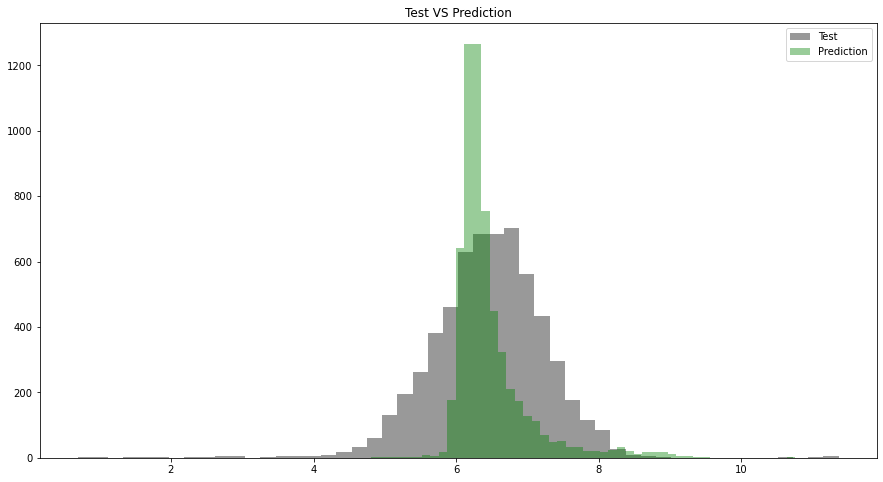

In [54]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

The graph above shows us that Linear Regression isn't performing well.The Actual Data (Black) and Predicted values (Green) are  much differing. So we can conclude that Linear Regression doesn't seem like a right choice for Trip duration prediction.

## Decision tree

In [55]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([5.47216474, 6.49151912, 6.60105732, ..., 6.85677318, 6.9356202 ,
       7.51344477])

In [56]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))

print ("Validation Score : ", est_dt.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(dt_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.7839978021946734
Validation Score :  0.535283581988699
Cross Validation Score :  0.5533697604312792
R2_Score :  0.40582022304016685
RMSLE :  0.07953457011755725


C:\Users\USER\anaconda3.x\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test VS Prediction')

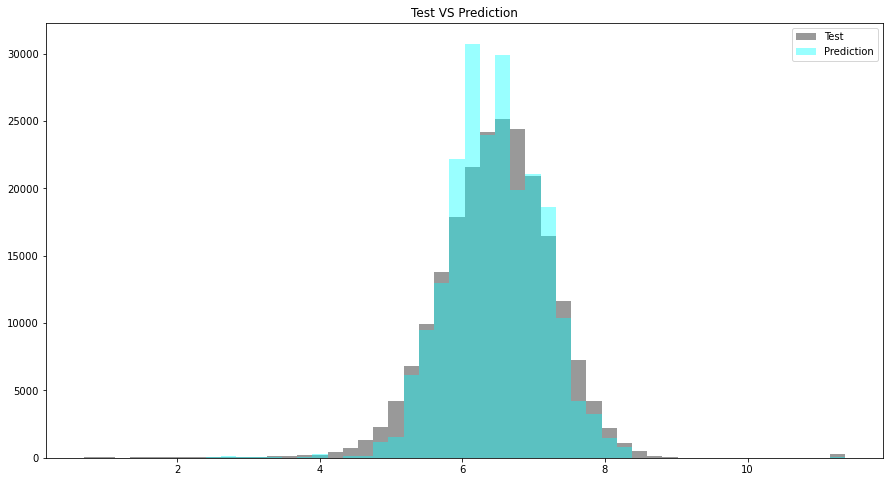

In [65]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above graph we can clearly say that the Decision Tree Algorithm is performing good. The Actual Data (black) and Predicted values (cyan) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction.

Variable importance. 
 
The basic decision trees use Gini Index or Information Gain to help determine which variables are most important.  That most important variable is then put at the top of your tree.

## Random forest

In [57]:
#random forest implementation

from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([5.76858827, 6.41824705, 6.6278346 , ..., 6.82830738, 6.70406674,
       7.37851282])

In [58]:
#examining metrics 

print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.7896184367495945
Validation Score :  0.6158910548407269
Cross Validation Score :  0.6442416982631338
R2_Score :  0.45037333478758257
RMSLE :  0.07427553856414787


C:\Users\USER\anaconda3.x\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test VS Prediction')

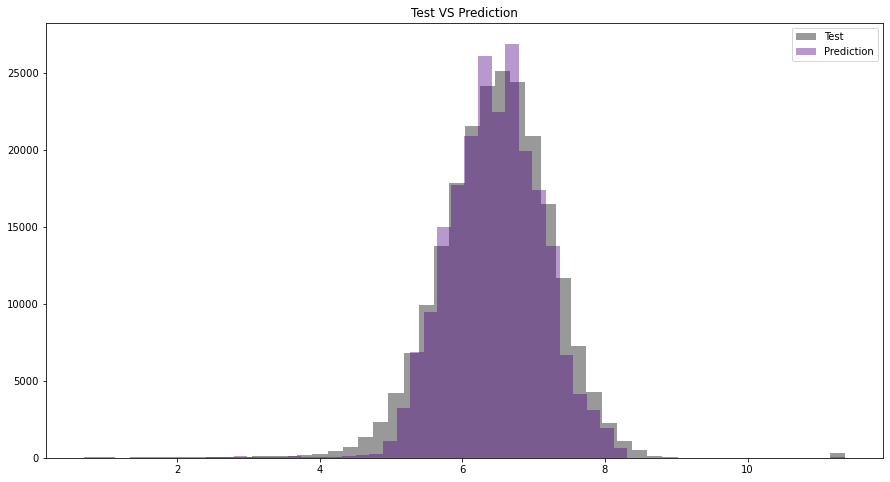

In [68]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above graph we can clearly identify that the Random Forest Algorithm is also performing good. The Actual Data (Black) and Predicted values (Purple) are as close as possible. We can conclude that Random Forest could be a good choice for Trip duration prediction.

## KNN

In [59]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [60]:
#to store rmse values for different k
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.9150015206307589
RMSE value for k=  2 is: 0.81594809609296
RMSE value for k=  3 is: 0.7876703412656885
RMSE value for k=  4 is: 0.7723521258457953
RMSE value for k=  5 is: 0.7635717296294392
RMSE value for k=  6 is: 0.7594316219629963
RMSE value for k=  7 is: 0.7530626180951984
RMSE value for k=  8 is: 0.749852485537742
RMSE value for k=  9 is: 0.7491659298602853
RMSE value for k=  10 is: 0.7477708030512633
RMSE value for k=  11 is: 0.7452501795499008
RMSE value for k=  12 is: 0.7439258003287154
RMSE value for k=  13 is: 0.7438948896545999
RMSE value for k=  14 is: 0.7449373527973939
RMSE value for k=  15 is: 0.7457058073008224
RMSE value for k=  16 is: 0.7450447146903081
RMSE value for k=  17 is: 0.7457649665394092
RMSE value for k=  18 is: 0.7468660572686129
RMSE value for k=  19 is: 0.7471818912624184
RMSE value for k=  20 is: 0.7473241979851789


<AxesSubplot:>

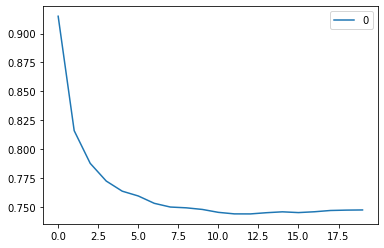

In [61]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. At k= 12, the RMSE is approximately 0.7439, and goes higher on further increasing the k value. We can say that k=12 will give us the best result in this case.

In [66]:
# Creating instance of KNN
est_knn = KNN(n_neighbors = 12)

# Fitting the model
est_knn.fit(X_train, y_train)

# Predicting over the Train Set and calculating F1
knn_pred = est_knn.predict(X_test)
k = mse(test_predict, y_test)
print('Test MSE    ', k )

Test MSE     0.5534255963947197


In [67]:
#examining metrics 

print ("Training Score : " , est_knn.score(X_train, y_train))

print ("Validation Score : ", est_knn.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_knn, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(knn_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(knn_pred, y_test)))

Training Score :  0.25451805348241674
Validation Score :  0.13736323738249245
Cross Validation Score :  0.09653879214391256
R2_Score :  -5.900879865164551
RMSLE :  0.10793042843758607


C:\Users\USER\anaconda3.x\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test VS Prediction')

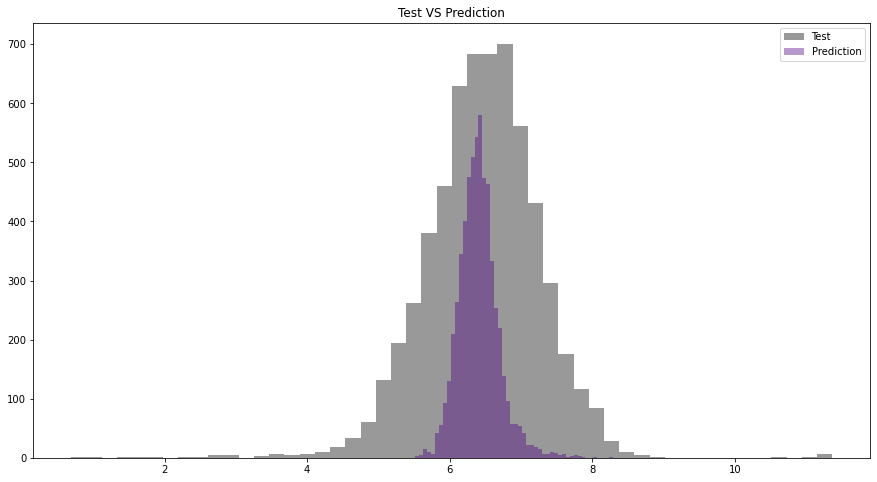

In [68]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(knn_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above graph we can clearly identify that the KNN Algorithm is not performing good. The Actual Data (Black) and Predicted values (Purple) are different. We cab conclude that KNN is not a good choice for Trip duration prediction.